In [1]:
"""
Bias sirve para dar elasticidad al modelo, imagina que la suma ponderada da 0 con un bias podemos cambiar ese valor a 2 u otro
La capa de entrada recibe la información
La capas ocultas procesan esta información
    Las primeras capas tienen la información más general
    Las últimas capas tienen información más precisa (pueden tender al overfiting)
La capa de salida realiza la predicción

El funcionamiento de una red neuronal está basado hasta cierto punto en operaciones lineales (multiplicación de matrices).
Estas operaciones lineales son apiladas y FALLA porque si sumamos muchas operaciones lineales el resultado será una línea
y se perderá todo el aprendizaje profundo. Así tengas una capa o millones, siempre tendrás un resultado lineal.

Aquí entran las funciones de activación.

AND = ESCALÓN
    Útil cuando tenemos 2 salidas
FUNCIÓN SIGMO

FUNCIÓN SIGMOIDAL
    Buena para usar en probabilidad.
    Tiene derivadas que se pueden utilizar para backpropagation

FUNCIÓN TANH
    Similar a la sigmoidal.
    
FUNCIÓN RELU
    Converge rápidos, más usada y tiene derivada
    
FUNCIÓN SOFTMAX
    Probabilidad de cada una de las salidas
"""

'\nBias sirve para dar elasticidad al modelo, imagina que la suma ponderada da 0 con un bias podemos cambiar ese valor a 2 u otro\nLa capa de entrada recibe la información\nLa capas ocultas procesan esta información\n    Las primeras capas tienen la información más general\n    Las últimas capas tienen información más precisa (pueden tender al overfiting)\nLa capa de salida realiza la predicción\n\nEl funcionamiento de una red neuronal está basado hasta cierto punto en operaciones lineales (multiplicación de matrices).\nEstas operaciones lineales son apiladas y FALLA porque si sumamos muchas operaciones lineales el resultado será una línea\ny se perderá todo el aprendizaje profundo. Así tengas una capa o millones, siempre tendrás un resultado lineal.\n\nAquí entran las funciones de activación.\n\nAND = ESCALÓN\n    Útil cuando tenemos 2 salidas\nFUNCIÓN SIGMO\n\nFUNCIÓN SIGMOIDAL\n    Buena para usar en probabilidad.\n    Tiene derivadas que se pueden utilizar para backpropagation\n\nF

### FUNCIONES DE ACTIVACIÓN

In [2]:
#Importamos las librerías a emplear
import numpy as np
import matplotlib.pyplot as plt

#### FUNCIÓN SIGMOIDE

In [14]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

In [15]:
#Creamos un array de prueba
x = np.linspace(-10, 10, 100)

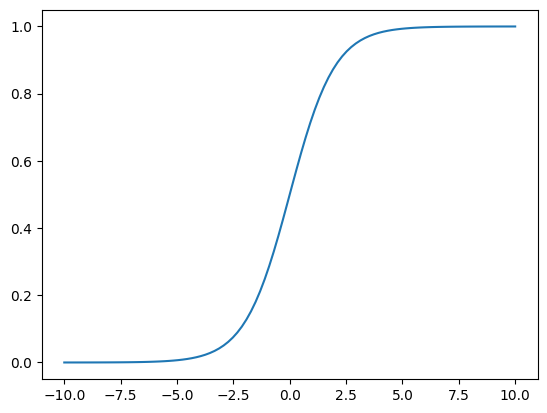

In [16]:
#Visualizamos
plt.plot(x, sigmoid(x))
plt.show()

#### FUNCIÓN ESCALÓN

In [32]:
def step(a):
    return np.piecewise(a, [a<0.0, a>0.0], [0, 1])

In [33]:
#Creamos un array de prueba
x = np.linspace(-10, 10, 100)

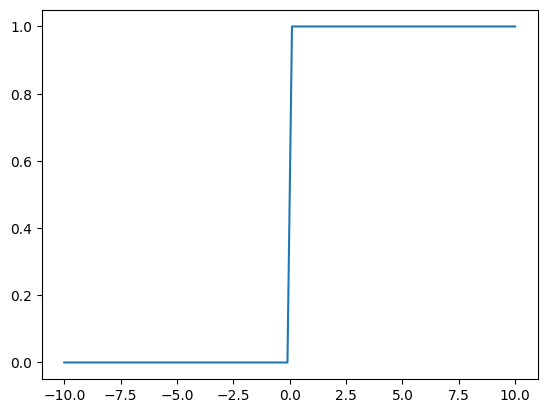

In [34]:
#Visualizamos
plt.plot(x, step(x))
plt.show()

#### FUNCIÓN RELU

In [38]:
def rel(a):
    return np.piecewise(a, [a<0.0, a>0.0], [0, lambda a:a])

In [39]:
#Creamos un array de prueba
x = np.linspace(-10, 10, 100)

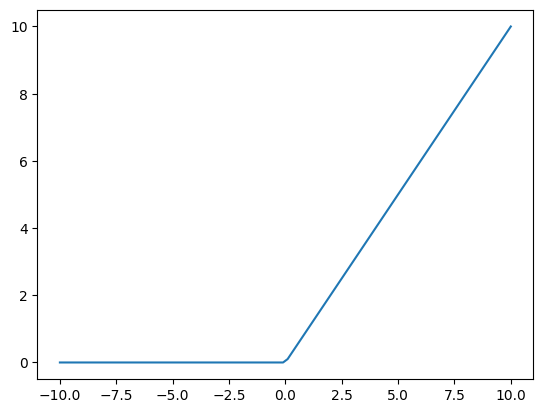

In [40]:
#Visualizamos
plt.plot(x, rel(x))
plt.show()

#### FUNCIÓN TANH

In [49]:
def tanh(a):
    return 1/(1+np.exp(-a))

In [50]:
#Creamos un array de prueba
x = np.linspace(-10, 10, 100)

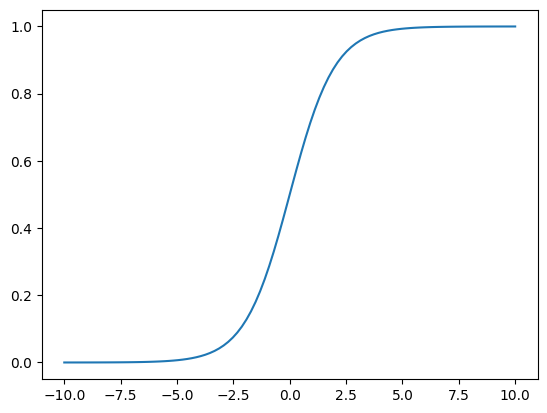

In [51]:
#Visualizamos
plt.plot(x, tanh(x))
plt.show()

### FUNCIÓN DE PÉRDIDA

In [52]:
#Toma los valores reales y compara con la predicción para dar un score

"""
Si el valor es alto significa que estamos lejos y caso contrario
MSE: Mean squared error
    Funciona bien para regresiones
CROSS ENTROY
    Funcion bien para valores categóricos o de clasificación

"""

'\nSi el valor es alto significa que estamos lejos y caso contrario\nMSE: Mean squared error\n    Funciona bien para regresiones\nCROSS ENTROY\n    Funcion bien para valores categóricos o de clasificación\n\n'

#### MSE: ERROR CUADRÁTICO MEDIO

In [70]:
#y: valor real
#y_hat: valor predecido
#derivate
#Los pesos se actualizan basándose en las funciones de activación y derivadas
def mse(y, y_hat, derivate = False):
    if derivate:
        return (y_hat - y)
    else:
        return np.mean((y_hat - y)**2)

In [71]:
real = np.array([0, 0, 1, 1])
prediction = np.array([0.9, 0.5, 0.2, 0.0])

In [72]:
mse(real, prediction)

0.675

In [76]:
#PORQUÉ ES IMPORTANTE DERIVAR?
"""
Asumiendo que queremos optimizar nuestra función de pérdida, buscamos minizar su valor, el punto más bajo posible, es decir
buscamos la pendiente y donde la pendiente sea nula o muy pequeña ahí es.
LEARNING RATE: Son los pasos utilizados para converger, un learning rate muy alto o muy bajo hace que nunca llegue a un mínimo global
DESCENSO DEL GRADIENTE SON LOS OPTIMIZADORES: Indica como actualizar los pesos al llevar el descenso del gradiente
"""

'\nAsumiendo que queremos optimizar nuestra función de pérdida, buscamos minizar su valor, el punto más bajo posible, es decir\nbuscamos la pendiente y donde la pendiente sea nula o muy pequeña ahí es.\nLEARNING RATE: Son los pasos utilizados para converger, un learning rate muy alto o muy bajo hace que nunca llegue a un mínimo global\nDESCENSO DEL GRADIENTE SON LOS OPTIMIZADORES: Indica como actualizar los pesos al llevar el descenso del gradiente\n'

#### BACKPROPAGATION

In [ ]:
"""
Consiste en como distribuir nuestro error en toda la red neuronal
Varias capas tienen ciertos pesos
pesos son operaciones con la data de entrada y pasarán info
en la capa final obtenemos una predicción
que se evaluará
pasará por una función de pérdida y nos indicará que tan bien vamos
tenemos la función de costo utilizaremos un descenso de gradiente
que actualizará los pesos
y repetiremos el ciclo

¿Cómo distribuimos el error?
BACKPROPAGATION: Vamos desde la última a la primera capa distribuyendo el error
Lo hacemos mediante derivadas parciales, por eso es importante que nuestras funciones anteriores tengan derivadas
"""